# تحميل (استيراد) المكتبات الأساسية
# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# تحميل البيانات Data downloading

In [2]:
# Read directly from the GFZ URL
url = "https://www-app3.gfz-potsdam.de/kp_index/Kp_ap_since_1932.txt"

# Read data while skipping header lines
df = pd.read_csv(
    url,
    delim_whitespace=True,
    comment='#',
    header=None,
    skiprows=30,
    names=["Year", "Month", "Day", "StartHour", "MidHour", "Days", "DaysMid", "Kp", "ap", "Definitive"]
)

# Construct datetime column
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']]) + pd.to_timedelta(df['StartHour'], unit='h')

/var/folders/jh/6nq_ym693fn165j5sx8tmqy00000gn/T/ipykernel_59437/3469887329.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


#  التواريخ الخاصة بفترة العاصفة الجيومغناطيسية
# Dates for the Geomagnetic storm

In [3]:
# Filter for Feb, 2022
df_filtered = df[
    (df['Datetime'].dt.year == 2022) &
    (df['Datetime'].dt.month == 2) &
    (df['Datetime'].dt.day >= 2) &
    (df['Datetime'].dt.day <= 5)
].copy()

# Round Kp values to nearest whole number
df_filtered['Kp'] = df_filtered['Kp'].round().astype(int)

# تعيين الألوان Color Mapping

In [4]:
# Assign color based on Kp value
def kp_to_color(kp):
    if kp == 0:
        return '#dceaf8'  # pale blue
    elif kp == 1:
        return '#c6e7c1'  # faint green
    elif kp == 2:
        return '#a3dd94'  # light green
    elif kp == 3:
        return '#8ad84b'  # green/yellow hint
    elif kp == 4:
        return '#f8e44e'  # yellow
    elif kp == 5:
        return '#f8b23c'  # light orange
    elif kp == 6:
        return '#f8822e'  # orange
    elif kp == 7:
        return '#f8571b'  # red-orange
    elif kp == 8:
        return '#e01919'  # strong red
    elif kp == 9:
        return '#a80000'  # dark red
    else:
        return 'gray'     # fallback

# Apply to each Kp value
colors = [kp_to_color(kp) for kp in df_filtered['Kp']]


# العرض Visualization

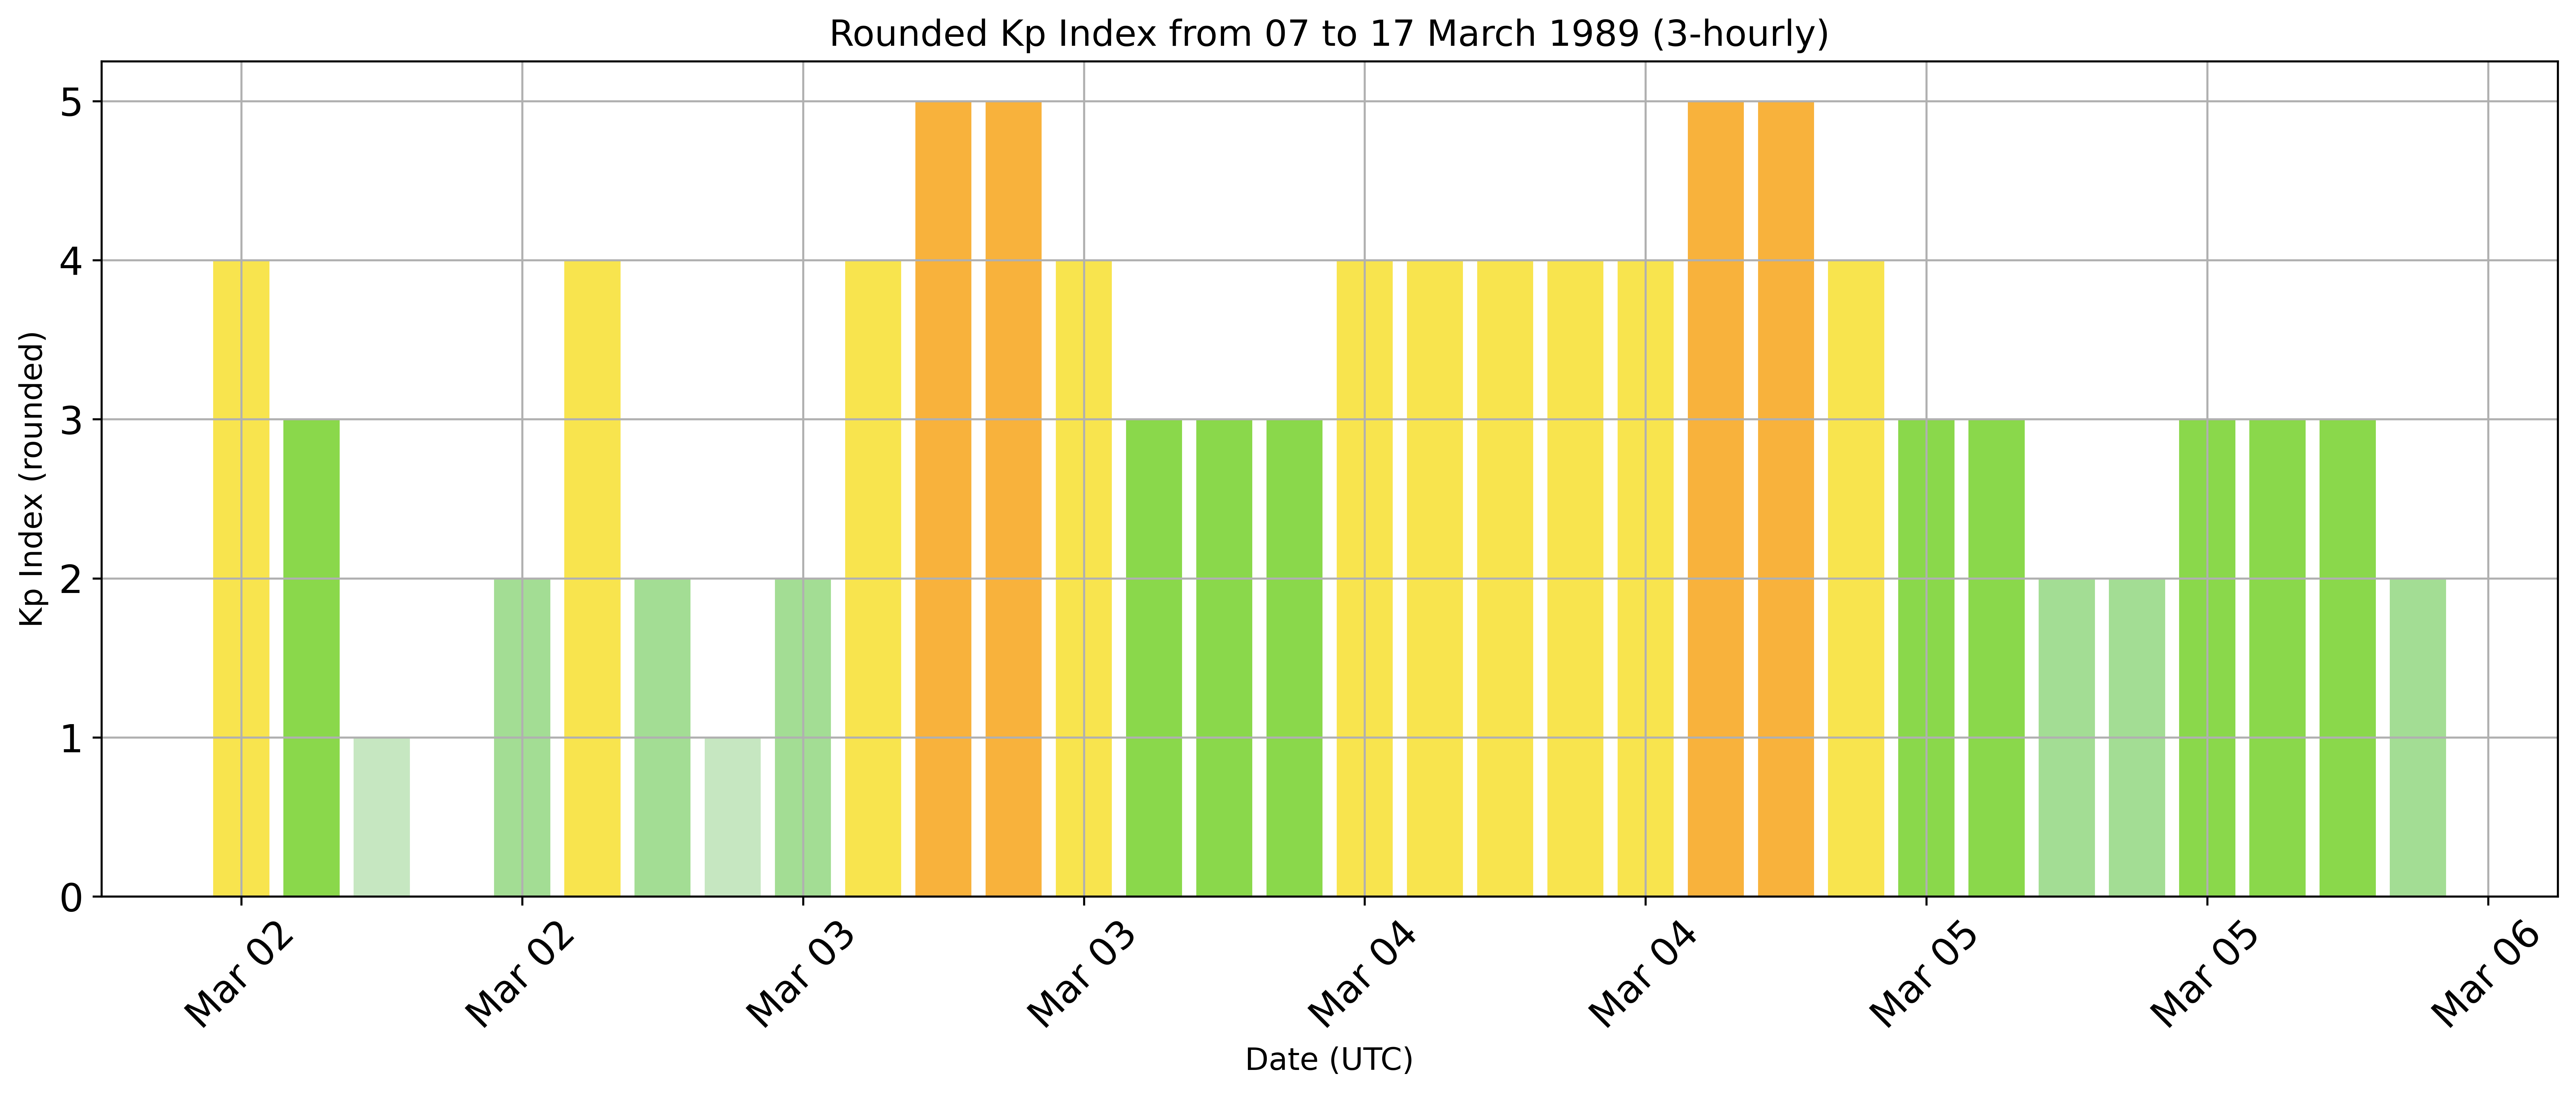

In [5]:
# Plot
plt.figure(figsize=(14, 6), dpi =600)
plt.bar(df_filtered['Datetime'], df_filtered['Kp'], width=0.1, color=colors)
plt.title('Rounded Kp Index from 07 to 17 March 1989 (3-hourly)', fontsize=14)
plt.xlabel('Date (UTC)', fontsize=12)
plt.ylabel('Kp Index (rounded)', fontsize=12)
plt.grid(True, axis='y')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('Mar %d'))
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.grid(True)  
plt.show()
